# Diabetes predication 

# Introduction

What is Diabetes?
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!


The objective of this project is to diagnostically predict whether a patient has diabetes or not, based on certain diagnostic measurements included in the dataset.

# Description

In this notebook, we are going to predict whether a patients having diabetes or not using various features like Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI etc

The dataset we are going to use is the diabetes info dataset from Kaggle which contains about 768 rows and 9 features.

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

# Objective

The objective of this project is to classify whether someone has diabetes or not.

Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)

The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'

The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

# Importing Libraries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report 

import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\HP\Documents\diabetes new ds.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,4,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,2,101,76,48,180,32.9,0.010,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Column information


Pregnancies : Number of pregnancies

Glucose : Glucose rate in person

BloodPressure : Blood pressure in person

SkinThickness : Person's skin thickness

Insulin : Insulin rate in person

BMI : Body mass index

DiabetesPedigreeFunction : A function that calculates our chances of having diabetes based on people in our ancestry

Age : Age

Outcome : Information about whether the person has diabetes or not (1 with the disease, 0 not sick)

# Exploratory Data Analysis

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2.476562,113.828125,69.105469,20.226562,77.585938,31.992578,0.469826,33.240885,0.348958
std,1.759896,38.679395,19.355807,16.181684,115.041744,7.884160,0.332850,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,95.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,2.000000,113.000000,72.000000,23.000000,11.000000,32.000000,0.372500,29.000000,0.000000
75%,4.000000,137.000000,80.000000,32.000000,120.500000,36.600000,0.626250,41.000000,1.000000
max,5.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Types of columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#Shape of the data set
df.shape

(768, 9)

# Get the null values

In [8]:
#Dropping duplicate values
df=df.drop_duplicates()

In [9]:
#Checking NULL values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Checking for 0 value and replacing it

#It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels.
#Hence we replace them with the mean value of that particular column.

In [10]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
7
241
376
11


#Replacing 0 values with median of that column

In [11]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2.476562,114.865621,72.254807,27.444010,82.971354,32.450911,0.469826,33.240885,0.348958
std,1.759896,37.104819,12.115932,9.140907,111.481498,6.875366,0.332850,11.760232,0.476951
min,0.000000,1.000000,24.000000,7.000000,1.000000,18.200000,0.000000,21.000000,0.000000
25%,1.000000,96.000000,64.000000,23.000000,11.000000,27.500000,0.243750,24.000000,0.000000
50%,2.000000,113.828125,72.000000,23.000000,12.500000,32.000000,0.372500,29.000000,0.000000
75%,4.000000,137.000000,80.000000,32.000000,120.500000,36.600000,0.626250,41.000000,1.000000
max,5.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,148.0,72.0,35,11,33.6,0.627,50,1
1,1,85.0,66.0,29,11,26.6,0.351,31,0
2,4,183.0,64.0,23,11,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [14]:
#checking size (col,lin) of dataset
print("Number of rows: " + str(df.shape[0]))
print("Number of Columns: " + str(df.shape[1]))

Number of rows: 768
Number of Columns: 9


In [15]:
#checking how many different values there are per column
df.nunique()

Pregnancies                   6
Glucose                     135
BloodPressure                47
SkinThickness                49
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    514
Age                          52
Outcome                       2
dtype: int64

# Visualization

# Count Plot :-
to see if the dataset is balanced or not

<Axes: xlabel='Outcome', ylabel='count'>

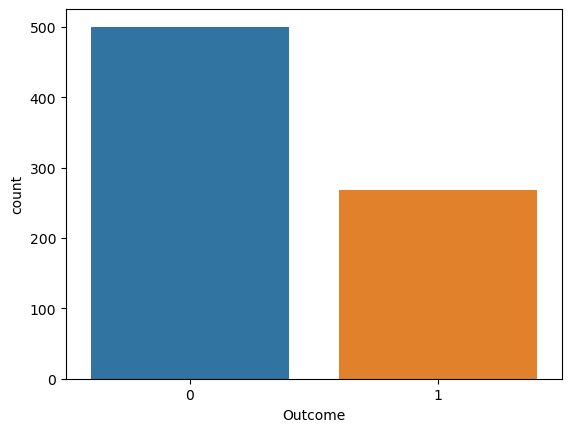

In [16]:
sns.countplot(x='Outcome', data=df)

# Countplot column Pregnancies

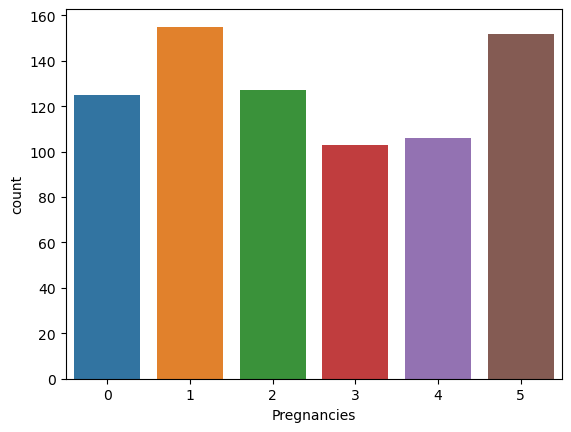

In [17]:
sns.countplot(data=df,x="Pregnancies" ,palette="tab10") 
plt.show()

# Correlation check

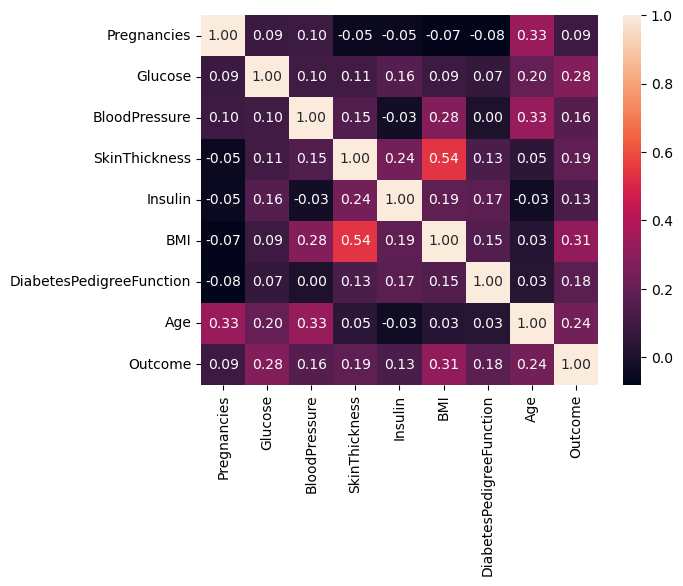

In [18]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# Create the clustered bar chart

In [19]:
melted_df = pd.melt(df,
    id_vars=["Outcome"],
    var_name="Independent Variable",
    value_name="Value",)

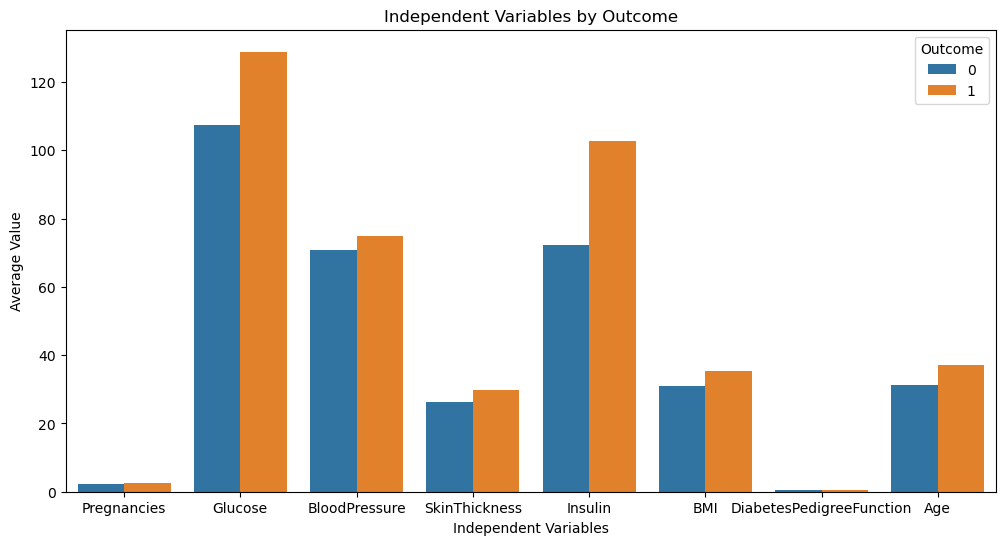

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x="Independent Variable",
    y="Value",
    hue="Outcome",
    errorbar=None,)
# Customize the plot
plt.title("Independent Variables by Outcome")
plt.ylabel("Average Value")
plt.xlabel("Independent Variables")
plt.legend(title="Outcome", loc="upper right")


# Show the plot
plt.show()



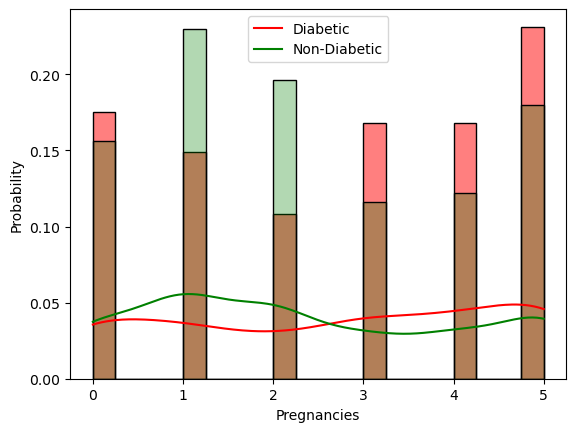

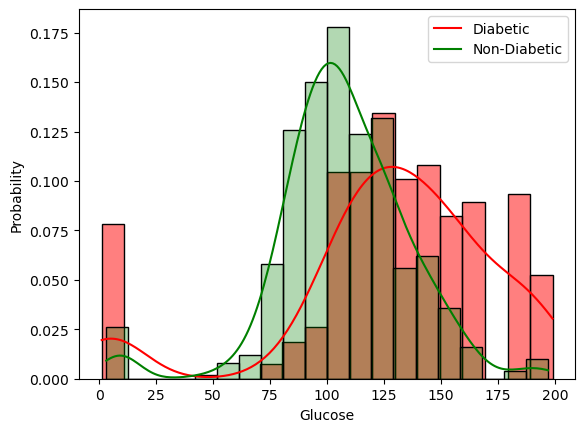

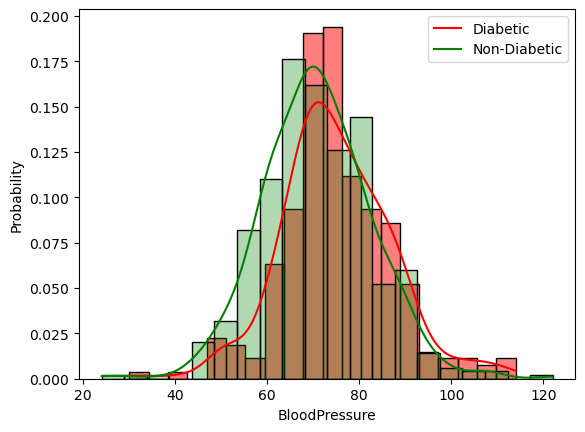

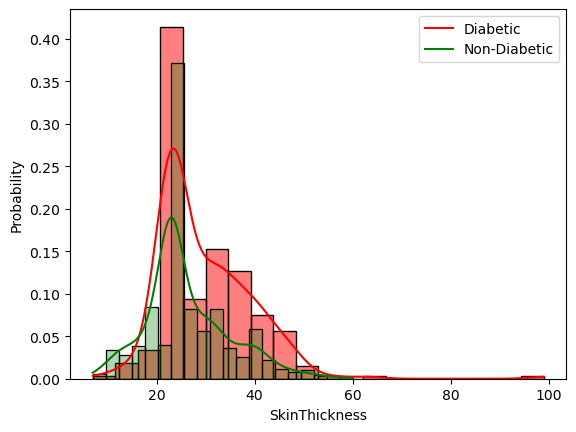

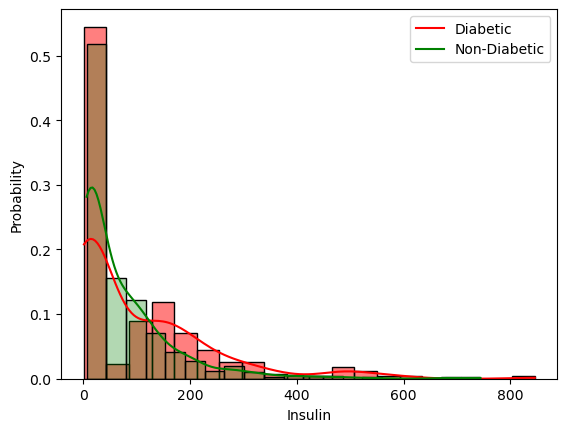

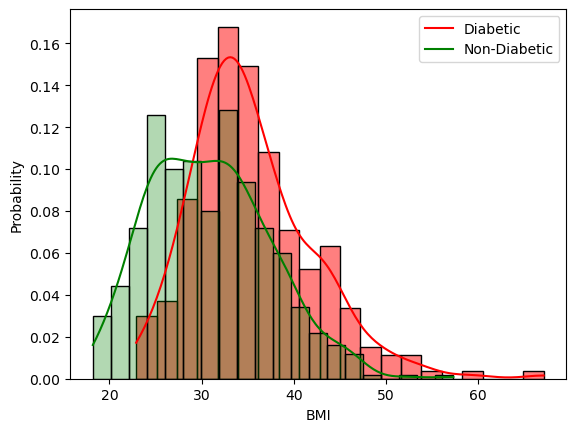

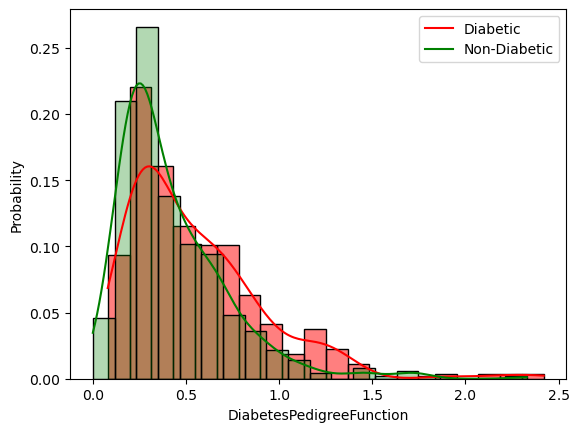

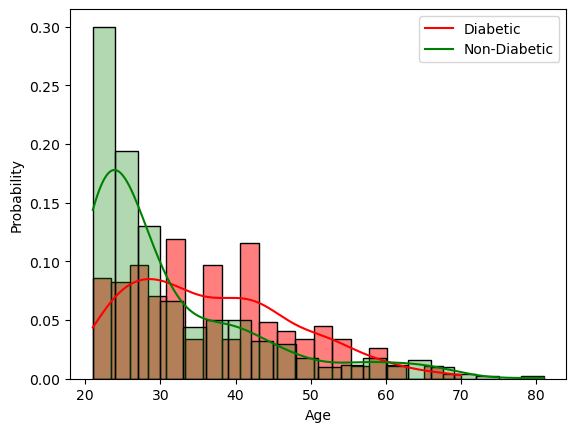

In [21]:
# Let's visualize the parameters for the two kinds of outcome separately
for feature in df.columns[:-1] :
    sns.histplot(data=df.loc[df['Outcome']==1][feature] , bins=20 , color = 'Red' , kde=True , label = f'Diabetic'  , stat='probability' , alpha = 0.5)
    sns.histplot(data=df.loc[df['Outcome']==0][feature] , bins=20 , color='green' , kde=True , label = f'Non-Diabetic' , stat='probability' , alpha = 0.3)
    plt.legend(['Diabetic' , 'Non-Diabetic'])
    plt.show()

# Separting Numeric and category Data

In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,148.0,72.0,35,11,33.6,0.627,50,1
1,1,85.0,66.0,29,11,26.6,0.351,31,0
2,4,183.0,64.0,23,11,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,2,101.0,76.0,48,180,32.9,0.010,63,0
764,2,122.0,70.0,27,11,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0
766,1,126.0,60.0,23,11,30.1,0.349,47,1


In [23]:
df_num=df.select_dtypes(['int','float'])
df_num

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,148.0,72.0,35,11,33.6,0.627,50,1
1,1,85.0,66.0,29,11,26.6,0.351,31,0
2,4,183.0,64.0,23,11,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,2,101.0,76.0,48,180,32.9,0.010,63,0
764,2,122.0,70.0,27,11,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0
766,1,126.0,60.0,23,11,30.1,0.349,47,1


In [24]:
df_object=df.select_dtypes(['object'])
df_object

""
0
1
2
3
4
...
763
764
765
766


# Features Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()


In [27]:
x=df.drop(columns=["Outcome"])
x
y= df["Outcome"]

In [28]:
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 1.43479054,  0.8935759 , -0.0210444 , ...,  0.16724016,
         0.4725157 ,  1.4259954 ],
       [-0.83955236, -0.80542324, -0.51658286, ..., -0.85155088,
        -0.35722672, -0.19067191],
       [ 0.86620481,  1.83746431, -0.68176235, ..., -1.33183808,
         0.60779979, -0.10558415],
       ...,
       [ 1.43479054,  0.16543341, -0.0210444 , ..., -0.90976751,
        -0.67589592, -0.27575966],
       [-0.83955236,  0.30027461, -1.01212132, ..., -0.34215536,
        -0.36323935,  1.17073215],
       [-0.83955236, -0.58967732, -0.18622389, ..., -0.29849289,
        -0.465454  , -0.87137393]])

In [29]:
df_scaled = pd.DataFrame(data=x_scaled, columns=x.columns)
print(df_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       1.434791  0.893576      -0.021044       0.827151 -0.646011  0.167240   
1      -0.839552 -0.805423      -0.516583       0.170334 -0.646011 -0.851551   
2       0.866205  1.837464      -0.681762      -0.486484 -0.646011 -1.331838   
3      -0.839552 -0.697550      -0.516583      -0.486484  0.098993 -0.633239   
4      -1.408138  0.596925      -2.663916       0.827151  0.763212  1.549885   
..           ...       ...            ...            ...       ...       ...   
763    -0.270967 -0.373931       0.309315       2.250256  0.870924  0.065361   
764    -0.270967  0.192402      -0.186224      -0.048606 -0.646011  0.632973   
765     1.434791  0.165433      -0.021044      -0.486484  0.260559 -0.909768   
766    -0.839552  0.300275      -1.012121      -0.486484 -0.646011 -0.342155   
767    -0.839552 -0.589677      -0.186224       0.389273 -0.646011 -0.298493   

     DiabetesPedigreeFunction       Age

In [30]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.434791,0.893576,-0.021044,0.827151,-0.646011,0.167240,0.472516,1.425995
1,-0.839552,-0.805423,-0.516583,0.170334,-0.646011,-0.851551,-0.357227,-0.190672
2,0.866205,1.837464,-0.681762,-0.486484,-0.646011,-1.331838,0.607800,-0.105584
3,-0.839552,-0.697550,-0.516583,-0.486484,0.098993,-0.633239,-0.910388,-1.041549
4,-1.408138,0.596925,-2.663916,0.827151,0.763212,1.549885,5.466002,-0.020496
...,...,...,...,...,...,...,...,...
763,-0.270967,-0.373931,0.309315,2.250256,0.870924,0.065361,-1.382380,2.532136
764,-0.270967,0.192402,-0.186224,-0.048606,-0.646011,0.632973,-0.390296,-0.531023
765,1.434791,0.165433,-0.021044,-0.486484,0.260559,-0.909768,-0.675896,-0.275760
766,-0.839552,0.300275,-1.012121,-0.486484,-0.646011,-0.342155,-0.363239,1.170732


# Split the Data Frame into X and y

In [31]:
target_name='Outcome'
y= df[target_name]
X=df.drop(target_name,axis=1)

In [32]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,148.0,72.0,35,11,33.6,0.627,50
1,1,85.0,66.0,29,11,26.6,0.351,31
2,4,183.0,64.0,23,11,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33


In [33]:
y.head() 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

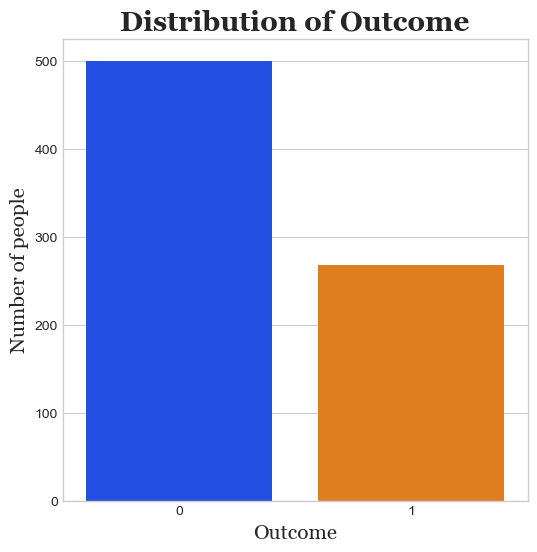

In [34]:
Outcome = df['Outcome'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 6))
sns.barplot(x=Outcome.index, y=Outcome.values, palette='bright')
plt.title('Distribution of Outcome', fontdict={
          'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Outcome', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# *Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [35]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x,y)

In [36]:
x=x_ros
y=y_ros

In [37]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
x_train.shape,y_train.shape

((800, 8), (800,))

In [40]:
x_test.shape,y_test.shape

((200, 8), (200,))

# Importing the models and Train them

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [42]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier(random_state=42)

In [43]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [44]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       105
           1       0.64      0.66      0.65        95

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.66      0.66       200



LogisticRegression()

# KNeighborsClassifier

In [45]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       105
           1       0.70      0.85      0.77        95

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.75       200
weighted avg       0.77      0.76      0.75       200



KNeighborsClassifier()

# Decision Tree

In [46]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       105
           1       0.79      0.89      0.84        95

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



DecisionTreeClassifier()

# SVM

In [47]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       105
           1       0.71      0.74      0.73        95

    accuracy                           0.73       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.74      0.73      0.74       200



SVC()

# RandomForestClassifier

In [48]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       105
           1       0.82      0.93      0.87        95

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



RandomForestClassifier(random_state=42)

# gridsearch using logistic regression

In [49]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    # C is the Regularization Parameter #Techinque to convert overfit to good fit is Regularization 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [53]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


    #estimator:This is the machine learning model for which you want to perform hyperparameter tuning. In your case, 
    #It's referred to as logreg, which suggests it's a logistic regression model. 


In [54]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [55]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.69625


In [56]:
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.72


In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.72


In [59]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state)]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}

classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid]

In [61]:
from sklearn.model_selection import StratifiedKFold

cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.78375
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8387499999999999
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.6812499999999999


# Gridsearch using random foresGridsearch using random forest

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid=param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [68]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [71]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [72]:
print("Best Parameters: ", gs.best_params_)
print("Best Score: ", gs.best_score_)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.8274999999999999


In [73]:
best_rf_model = gs.best_estimator_

In [74]:
y_pred = best_rf_model.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.885


In [76]:
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

# Model Comparison and Conclusions

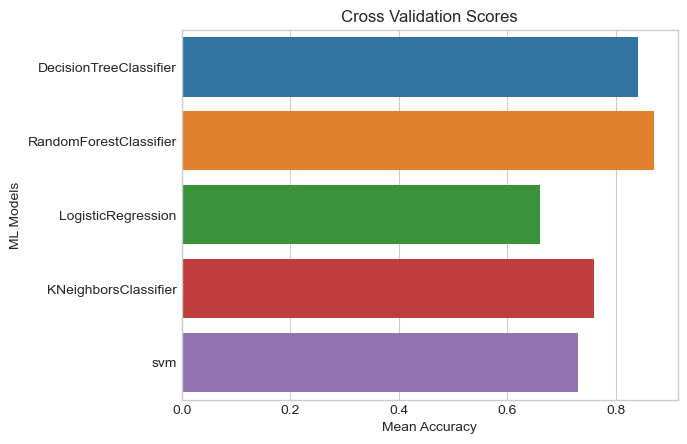

In [80]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [0.84,0.87,0.66,0.76,0.73],
    "ML Models": ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression","KNeighborsClassifier","svm"]
})

# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()


# Conclusion

In this project, we build various models like logistic regression, knn classifier,decision tree classifier,svm & random forest classifier

A Random Forest Classifier gives the highest accuracy score of 87.00 percent among all the ML Models.

So for the Diabetes prediction Random Forest is best model